In [1]:
import pandas as pd
import os

We first focus on the daily usage of Chinese-related racial slurs on Twitter from 2020/1 to 2020/12

## Read in all the csv files

Read in 12 csv files, organize them into 12 dictioanries corresponding to 12 months. Each monthly dictionary has keys corresponding to date and value corresponding to that date's DataFrame. Each date's DataFrame contains all scraped tweets.

In [2]:
folder_1_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-01-slur'
folder_2_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-02-slur'
folder_3_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-03-slur'
folder_4_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-04-slur'
folder_5_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-05-slur'
folder_6_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-06-slur'
folder_7_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-07-slur'
folder_8_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-08-slur'
folder_9_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-09-slur'
folder_10_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-10-slur'
folder_11_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-11-slur'
folder_12_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-12-slur'

In [3]:
files_1 = os.listdir(folder_1_path)
files_2 = os.listdir(folder_2_path)
files_3 = os.listdir(folder_3_path)
files_4 = os.listdir(folder_4_path)
files_5 = os.listdir(folder_5_path)
files_6 = os.listdir(folder_6_path)
files_7 = os.listdir(folder_7_path)
files_8 = os.listdir(folder_8_path)
files_9 = os.listdir(folder_9_path)
files_10 = os.listdir(folder_10_path)
files_11 = os.listdir(folder_11_path)
files_12 = os.listdir(folder_12_path)

In [4]:
def create_df(files, folder_path):
    dfs = {}
    for file in files:
        df = pd.read_csv(os.path.join(folder_path, file))
        dfs[file[:-4]] = df
    return dfs

Each dfs is a dictionary (representing a month), key is the date and value is the DataFrame correspoonding to each day in that month

In [5]:
dfs_1 = create_df(files_1, folder_1_path)
dfs_2 = create_df(files_2, folder_2_path)
dfs_3 = create_df(files_3, folder_3_path)
dfs_4 = create_df(files_4, folder_4_path)
dfs_5 = create_df(files_5, folder_5_path)
dfs_6 = create_df(files_6, folder_6_path)
dfs_7 = create_df(files_7, folder_7_path)
dfs_8 = create_df(files_8, folder_8_path)
dfs_9 = create_df(files_9, folder_9_path)
dfs_10 = create_df(files_10, folder_10_path)
dfs_11 = create_df(files_11, folder_11_path)
dfs_12 = create_df(files_12, folder_12_path)

## Calculate Twitter dataset's size by day and by month

In [6]:
def day_count(dfs):
    ''' 
    Helper function to calculate the number of tweets in each day 
    in a given month DataFrame
    '''

    monthly_count = []
    for key, values in dfs.items():
        date = pd.to_datetime(key).strftime('%m-%d')
        count = values.shape[0]
        monthly_count.append((date, count))
    sorted_monthly_count = sorted(monthly_count, key=lambda x: x[0])

    return sorted_monthly_count

Each count variable is a list of tuples representing the number of scraped tweets in that month.
Each tuple in the list has 2 elements: date and number of tweets on that day

In [7]:
jan_count = day_count(dfs_1)
feb_count = day_count(dfs_2)
mar_count = day_count(dfs_3)
apr_count = day_count(dfs_4)
may_count = day_count(dfs_5)
jun_count = day_count(dfs_6)
jul_count = day_count(dfs_7)
aug_count = day_count(dfs_8)
sep_count = day_count(dfs_9)
oct_count = day_count(dfs_10)
nov_count = day_count(dfs_11)
dec_count = day_count(dfs_12)

In [8]:
print(jan_count)

[('01-01', 442), ('01-02', 590), ('01-03', 719), ('01-04', 659), ('01-05', 506), ('01-06', 524), ('01-07', 691), ('01-08', 884), ('01-09', 856), ('01-10', 703), ('01-11', 604), ('01-12', 643), ('01-13', 819), ('01-14', 735), ('01-15', 727), ('01-16', 946), ('01-17', 1001), ('01-18', 994), ('01-19', 679), ('01-20', 638), ('01-21', 667), ('01-22', 771), ('01-23', 709), ('01-24', 718), ('01-25', 579), ('01-26', 679), ('01-27', 597), ('01-28', 673), ('01-29', 938), ('01-30', 840), ('01-31', 995)]


Calculate the total number of scraped tweets in each month

In [9]:
monthly_count_lst = []
for counts in [jan_count, feb_count, mar_count, apr_count, may_count, jun_count, jul_count, aug_count, sep_count, oct_count, nov_count, dec_count]:
    monthly_count = 0
    for (_, count) in counts:
        monthly_count += count
    monthly_count_lst.append(monthly_count)

In [14]:
print('Number of total scraped tweets each month: ', monthly_count_lst)
print('Total counts of scraped tweets = ', sum(monthly_count_lst))

Number of total scraped tweets each month:  [22526, 20509, 23579, 27315, 27042, 26638, 27602, 24554, 23676, 27015, 25161, 28372]
Total counts of scraped tweets =  303989


## Manual clean data based on keywords

When examning the csv file, I notice a relatively large amount of tweets including the keyword "chyna" refer to the famous model "Blac Chyna," which means I need to investigate the impact of this public figure on my dataset 

In [11]:
def calculate_blac_chyna_count(dfs):
    ''' 
    Helper function to calculate the number of tweets including the keywords blac chyna
    '''

    blac_chyna_count = 0
    for _, df in dfs.items():
        text_lower = df['Text'].str.lower()
        username_lower = df['Username'].str.lower()
        blac_chyna_count += (text_lower.str.contains('blac chyna')).sum()
        blac_chyna_count += (username_lower.str.contains('blac chyna')).sum()

    return blac_chyna_count

Call the above function to check how many tweets contain 'blac chyna' or 'Blac Chyna'
Decide if we need to remove tweets of these keywords

In [12]:
jan_blac = calculate_blac_chyna_count(dfs_1)
feb_blac = calculate_blac_chyna_count(dfs_2)
mar_blac = calculate_blac_chyna_count(dfs_3)
apr_blac = calculate_blac_chyna_count(dfs_4)
may_blac = calculate_blac_chyna_count(dfs_5)
jun_blac = calculate_blac_chyna_count(dfs_6)
jul_blac = calculate_blac_chyna_count(dfs_7)
aug_blac = calculate_blac_chyna_count(dfs_8)
sep_blac = calculate_blac_chyna_count(dfs_9)
oct_blac = calculate_blac_chyna_count(dfs_10)
nov_blac = calculate_blac_chyna_count(dfs_11)
dec_blac = calculate_blac_chyna_count(dfs_12)

blac_counts = jan_blac, feb_blac, mar_blac, apr_blac, may_blac, jun_blac, jul_blac, aug_blac, sep_blac, oct_blac, nov_blac, dec_blac
print('Number of tweets containing blac chyna in each month = ', blac_counts)
print('Total number of tweets containing blac chyna = ', sum(blac_counts))

Number of tweets containing blac chyna in each month =  (3030, 3479, 1557, 3357, 1751, 1383, 2432, 1257, 1833, 1449, 1191, 828)
Total number of tweets containing blac chyna =  23547


In [15]:
minus_chyna_lst = []
for x, y in zip(monthly_count_lst, blac_counts): 
    minus_chyna = x - y
    minus_chyna_lst.append(minus_chyna)
print('Number of tweets excluding blac chyna in each month = ', minus_chyna_lst)
print('Total number of tweets excluding blac chyna = ', sum(minus_chyna_lst))

Number of tweets excluding blac chyna in each month =  [19496, 17030, 22022, 23958, 25291, 25255, 25170, 23297, 21843, 25566, 23970, 27544]
Total number of tweets excluding blac chyna =  280442


<i>After manually go through my scraped Twitter dataset, I found that the racial slur keyword "chyna" can be very misleading as many tweets including this word use it as a last name or first name with neutral meaning, so remove this keyword compeletely.</i>

In [17]:
for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    for key, df in dfs.items():
        drop_index = df[df['Text'].str.contains('chyna') | df['Text'].str.contains('Chyna') | df['Username'].str.contains('chyna') | df['Username'].str.contains('Chyna')].index
        df.drop(index=drop_index, inplace=True)
        df.reset_index(drop=True, inplace=True)

In [16]:
# chyna_counts = 0
# for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
#     for key, df in dfs.items():
#         for index, row in df.iterrows():
#             if ('chyna' in row['Text']) | ('Chyna' in row['Text']) | ('chyna' in row['Username']) | ('Chyna' in row['Username']):
#                 chyna_counts += 1
# chyna_counts

174342

In [18]:
new_jan_count = day_count(dfs_1)
new_feb_count = day_count(dfs_2)
new_mar_count = day_count(dfs_3)
new_apr_count = day_count(dfs_4)
new_may_count = day_count(dfs_5)
new_jun_count = day_count(dfs_6)
new_jul_count = day_count(dfs_7)
new_aug_count = day_count(dfs_8)
new_sep_count = day_count(dfs_9)
new_oct_count = day_count(dfs_10)
new_nov_count = day_count(dfs_11)
new_dec_count = day_count(dfs_12)

In [19]:
new_monthly_count_lst = []
for counts in [new_jan_count, new_feb_count, new_mar_count, new_apr_count, new_may_count, new_jun_count, 
               new_jul_count, new_aug_count, new_sep_count, new_oct_count, new_nov_count, new_dec_count]:
    monthly_count = 0
    for (_, count) in counts:
        monthly_count += count
    new_monthly_count_lst.append(monthly_count)
print('New monthly counts of tweets = ', new_monthly_count_lst)
print('New total counts of tweets', sum(new_monthly_count_lst))

New monthly counts of tweets =  [8841, 6895, 10940, 10911, 12322, 13820, 11521, 10630, 10021, 11461, 11448, 10837]
New total counts of tweets 129647


## Visualize Cleaned Twitter Dataset

In [20]:
import matplotlib.pyplot as plt

In [39]:

def plot_daily(month_count):
    ''' 
    Helper function to plot counts of each month's scraped tweets
    '''

    plt.figure(figsize=(20, 7))
    days = [t[0] for t in month_count]
    counts = [t[1] for t in month_count]
    plt.plot(days, counts)
    plt.title('Daily Tweet Counts')
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.show()

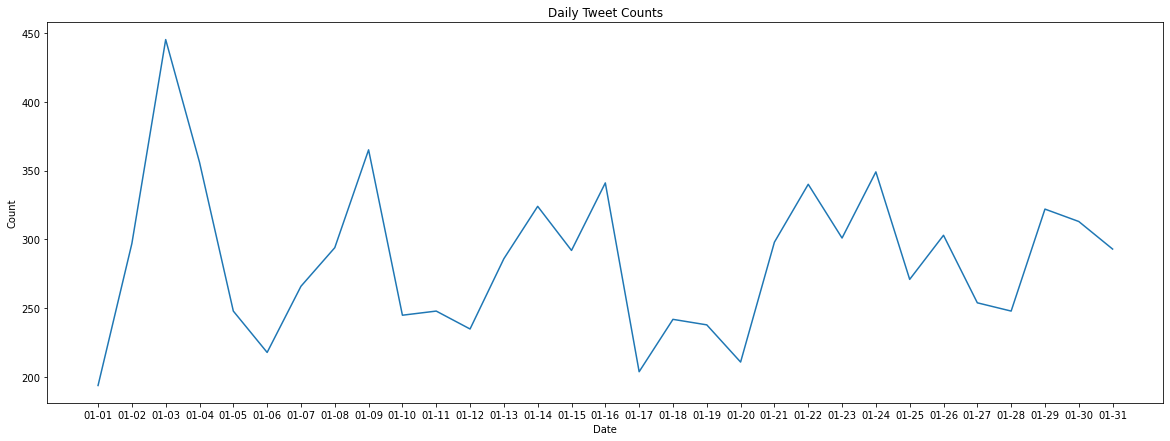

In [40]:
plot_daily(new_jan_count) # Jan tweet counts

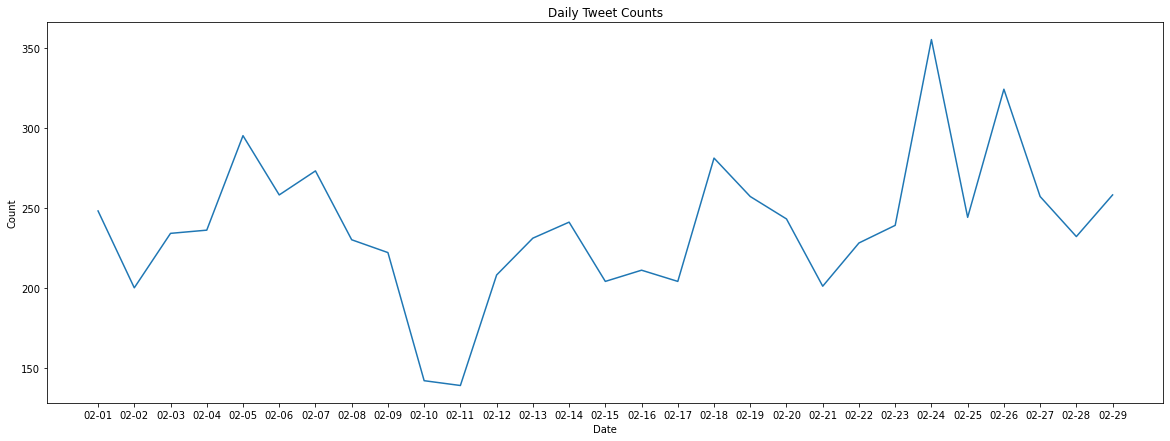

In [41]:
plot_daily(new_feb_count) # Feb tweet Count

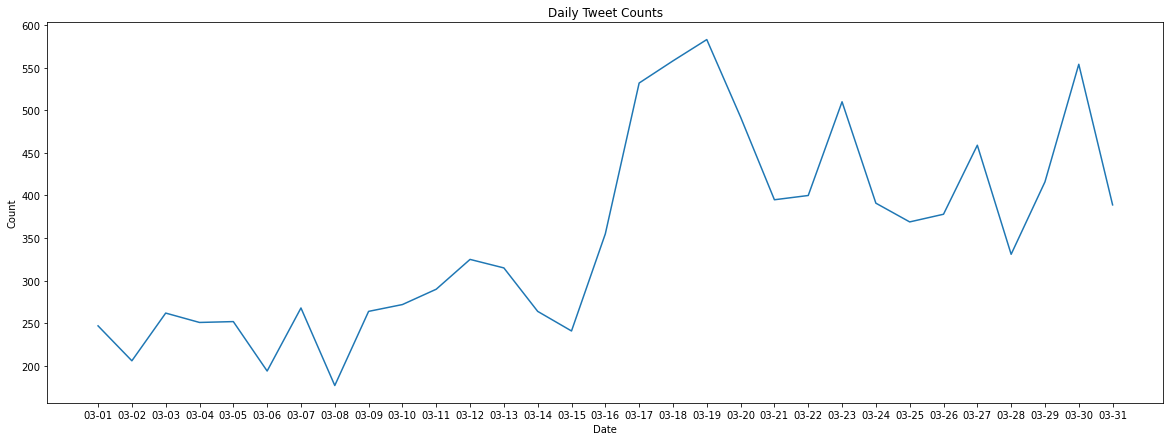

In [42]:
plot_daily(new_mar_count) # March tweet count

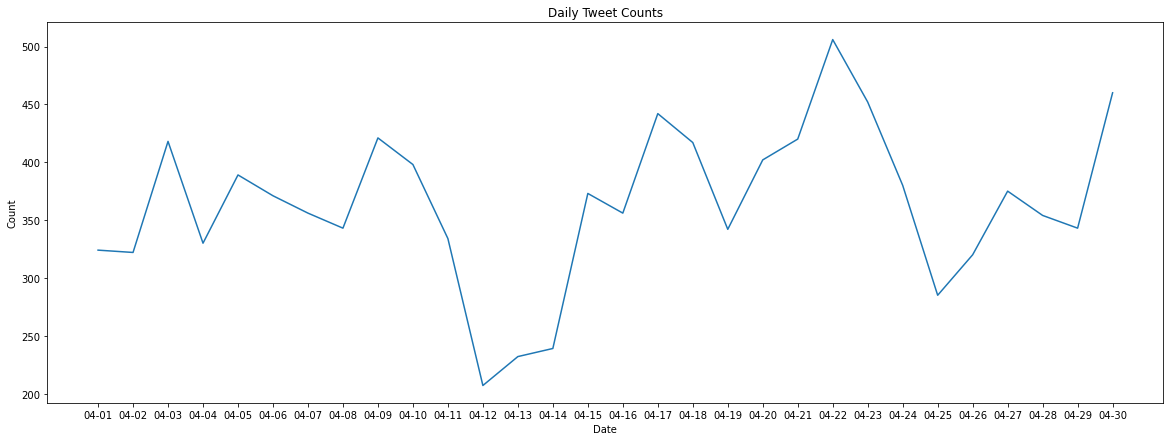

In [25]:
plot_daily(new_apr_count) # April tweet count

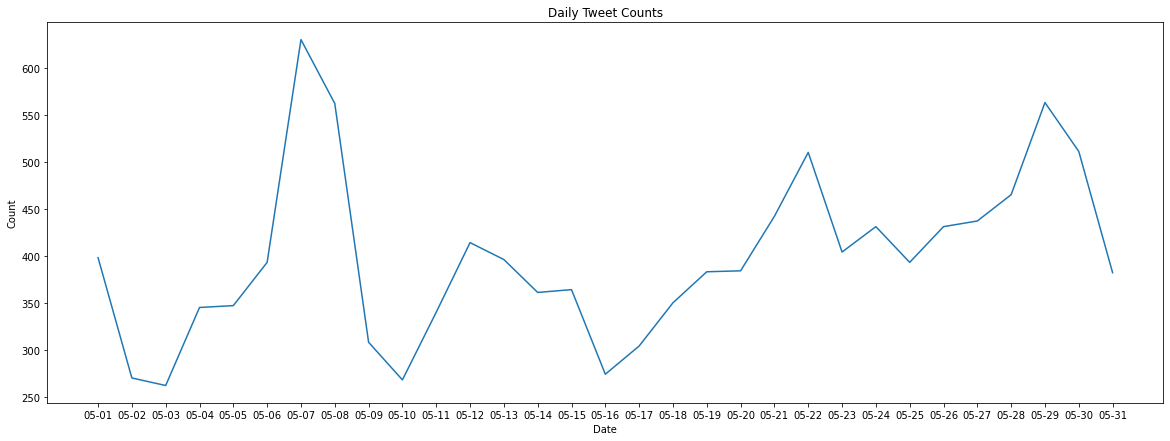

In [26]:
plot_daily(new_may_count) # May tweet count

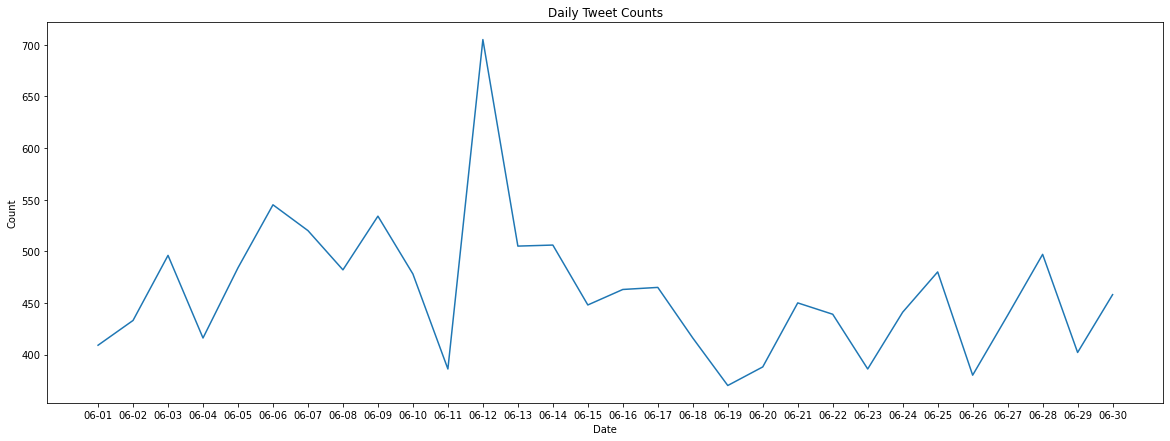

In [27]:
plot_daily(new_jun_count) # June tweet count

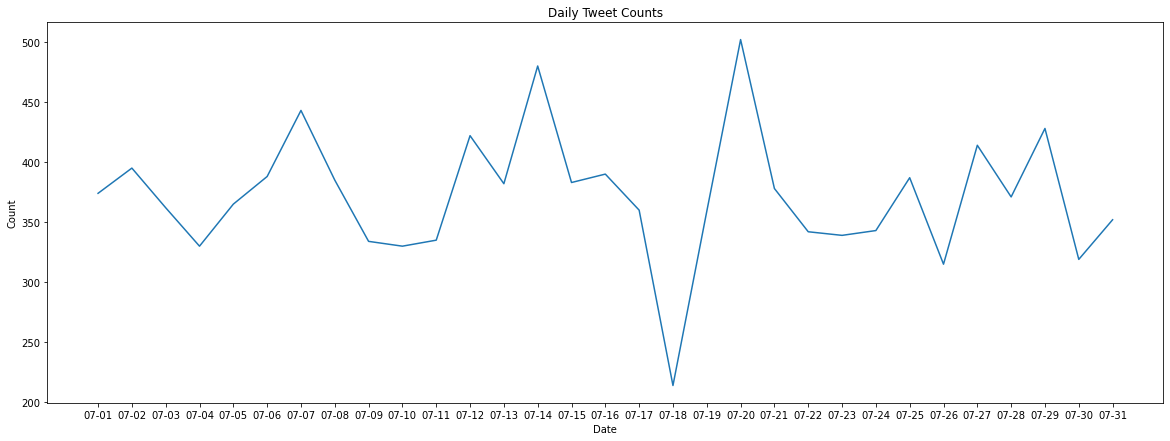

In [28]:
plot_daily(new_jul_count) # July tweet count

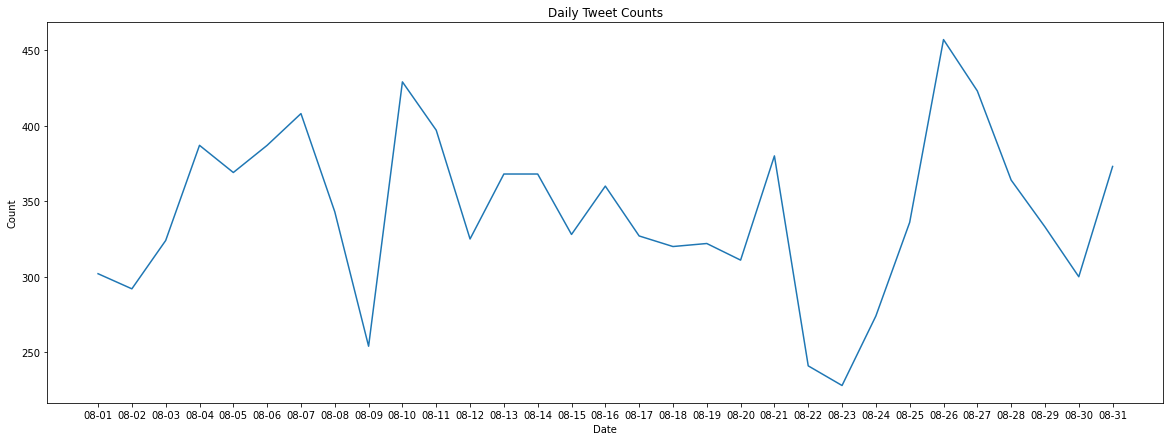

In [29]:
plot_daily(new_aug_count) # August tweet count

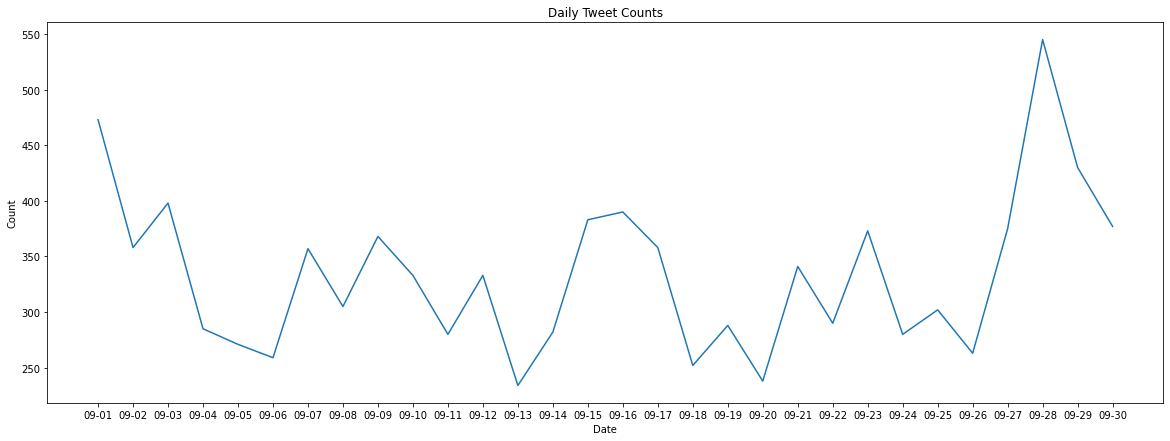

In [30]:
plot_daily(new_sep_count) # September tweet count

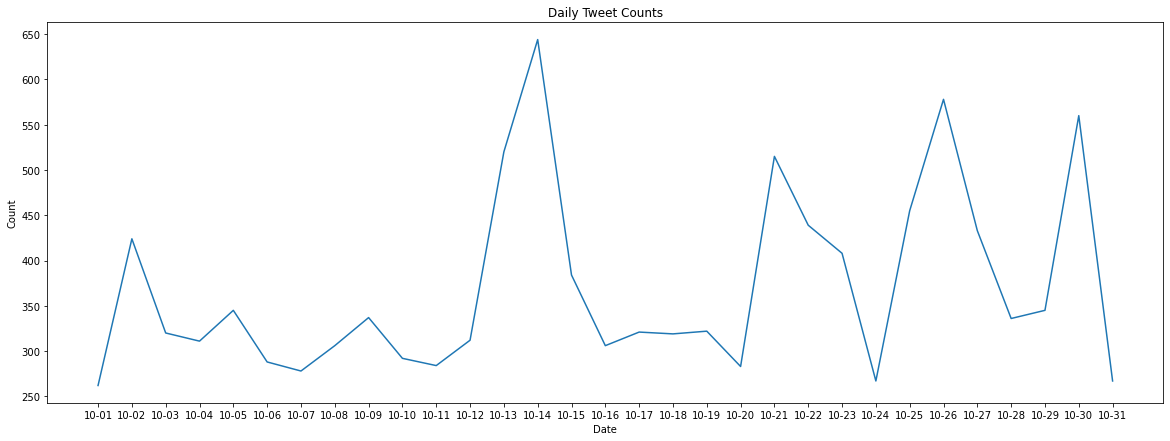

In [31]:
plot_daily(new_oct_count) # Oct tweet count

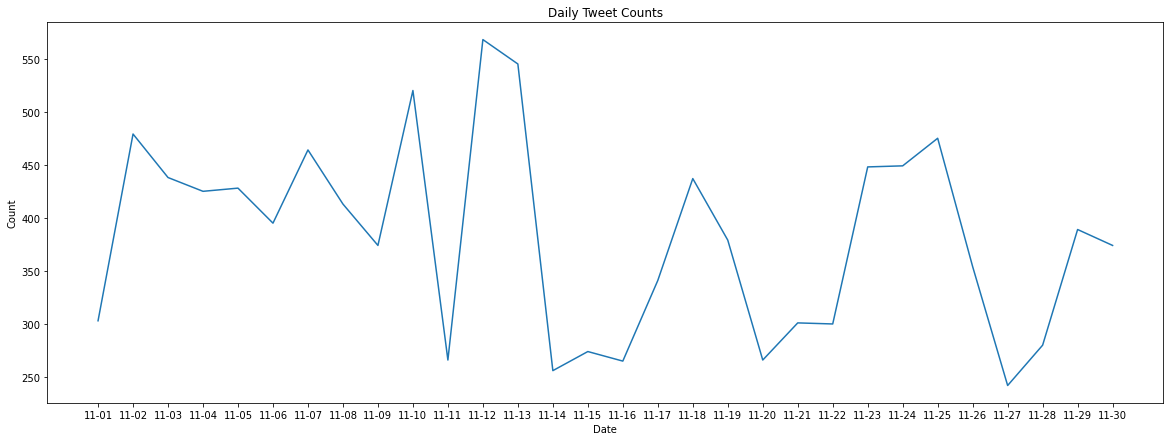

In [32]:
plot_daily(new_nov_count) # Nov tweet count

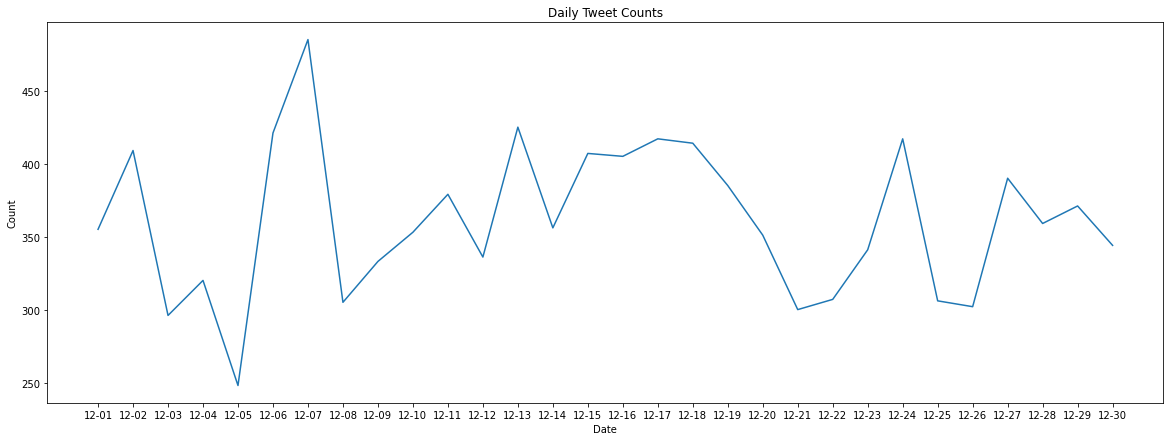

In [33]:
plot_daily(new_dec_count) # Notice that even after blac chyna, Dec is still very unusual and high

### Visualize daily tweet counts throughout the year of 2020

In [43]:
new_monthly_count_lst

[8841,
 6895,
 10940,
 10911,
 12322,
 13820,
 11521,
 10630,
 10021,
 11461,
 11448,
 10837]

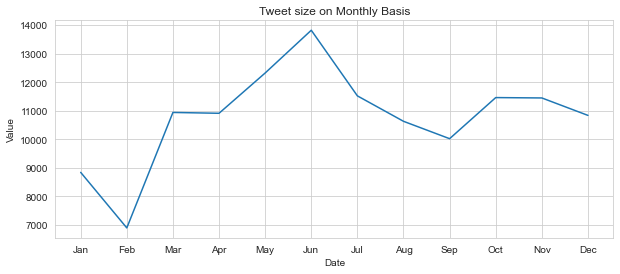

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(months, new_monthly_count_lst)
plt.title("Tweet size on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [45]:
all_counts = new_jan_count + new_feb_count + new_mar_count + new_apr_count + new_may_count + new_jun_count \
        + new_jul_count + new_aug_count + new_sep_count + new_oct_count + new_nov_count + new_dec_count
len(all_counts)

365

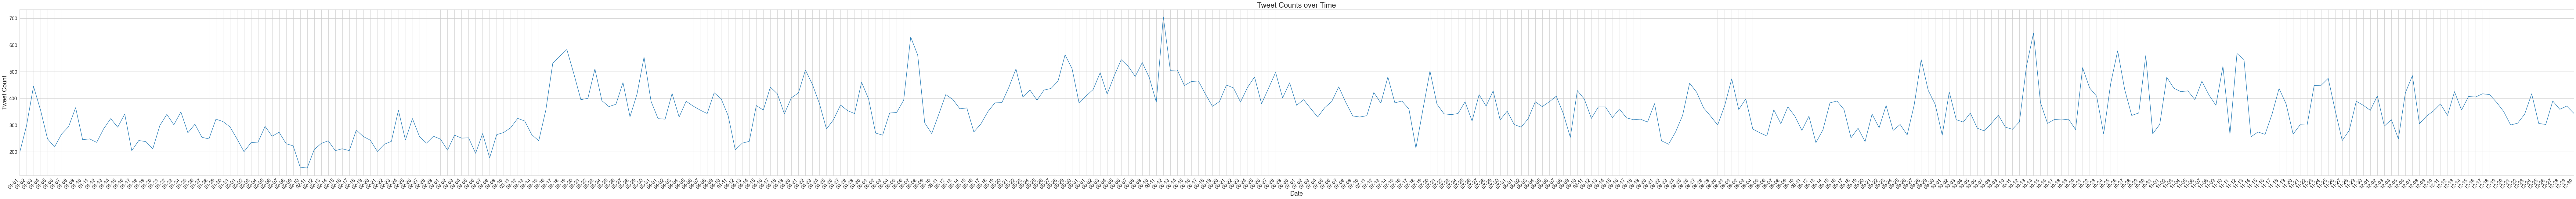

In [46]:
import seaborn as sns
all_dates = [t[0] for t in all_counts]
all_tweet_counts = [t[1] for t in all_counts]

plt.figure(figsize=(150, 10))

sns.set_style('whitegrid')
sns.lineplot(x=all_dates, y=all_tweet_counts)

plt.xlabel('Date', fontsize=20)
plt.ylabel('Tweet Count', fontsize=20)
plt.title('Tweet Counts over Time', fontsize=24)

plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(min(all_dates), max(all_dates))

plt.show()

## Further clean data based on sentiment analysis

Although I collected tweets based on racial slurs used and recommended by other researchers in their studies,
it is possible that the keywords have a different meaning and hence the tweets I collected are not in fact Sinophobic. To address this issue, I will conduct a series of sentiment analysis to find the negative sentiment tweets

In [47]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/itsyuzhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
def preprocess_tweet(tweet):
    ''' 
    Helper function to preprocess a given tweet for future sentiment analysis
    '''

    tweet = tweet.lower() # Convert to lowercase
    tweet = re.sub(r'http\S+', '', tweet) # Remove URLs
    tweet = re.sub(r'[^\w\s]', '', tweet) # Remove punctuation
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
    tweet = lemmatizer.lemmatize(tweet)
    tweet = stemmer.stem(tweet)

    return tweet

In [49]:
# Clean and preprocess all data frames corresponding to each month of tweet, already preprocessed Jan in the above section
for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    for df in dfs.values():
        df['Preprocessed Text'] = df["Text"].apply(preprocess_tweet)

In [50]:
dfs_1['2020-01-01']['Preprocessed Text'] # Example of preprocessed texts

0                lilnasx msgwentaylor naw space gook god
1      chinaman good time eating good time famous chi...
2                               chinaman_123 10 tokenpay
3      deespeak zee5premium mohituraina sidpmalhotra ...
4                       deaf people know farts make nois
                             ...                        
189    dont like new year across neighbours dressing ...
190    still remember first time someone called chink...
191    yall idea people really jokes back high school...
192    secpompeo corruption needs exported lets also ...
193                 bitibities27 thank youhappy new year
Name: Preprocessed Text, Length: 194, dtype: object

In [51]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def sentiment_score(df):
    ''' 
    Helper function to calculate the polarity score as measurement of tweet sentiment for each month data frame.
    Change the original DataFrame by including sentiment information/columns
    '''

    scores = df['Preprocessed Text'].apply(sia.polarity_scores)
    df['Negative Scores'] = scores.apply(lambda x: x['neg'])
    df['Compound Scores'] = scores.apply(lambda x: x['compound'])
    df['Negative Sentiment'] = scores.apply(lambda x: x['neg'] > 0)

In [164]:
example1 = sia.polarity_scores('Wouldn’t want some gook screaming on my face either')
print(example1)
example2 = sia.polarity_scores('Main people saying they refuse to eat Chinese food cause of the Coronavirus don’t even go to the doctors anyway. Pure ignorance.')
print(example2)
example3 = sia.polarity_scores('LMFAO I COULD JUST IMAGINE YOU LOOKING LIKE A GOOK 😂😂😂😂')
print(example3)
example4 = sia.polarity_scores("@505_cockers Yes but they can't bowl Chinaman's that turn a mile or dig a trench in the middle of a rivals square can they Cockers? @HayesyBoy23")
print(example4)
example5 = sia.polarity_scores('Chinaman is not the preferred nomenclature. Asian-American, please.')
print(example5)
example6 = sia.polarity_scores('Omg I’m Working With These Gook Again')
print(example6)
example7 = sia.polarity_scores("nana need to bring ha ass on ' got me sitting in this damn car ' while she talk to chyna ass 🙄😒")
print(example7)
example8 = sia.polarity_scores('“ if chyna robs me, I’m killing everyone in Shanghai”')
print(example8)
example9 = sia.polarity_scores('Chink eyes , when Im high !')
print(example9)
example10 = sia.polarity_scores('Damn im stinkin like a chink rn 😂😂')
print(example10)
example11 = sia.polarity_scores('@IrisSensei_ @Rushherss @aghastlou @Royal_CTV you’re also a chinaman, lowest in society')
print(example11)
example12 = sia.polarity_scores('"It comes from Chyna"')
print(example12)
example13 = sia.polarity_scores('Trump had security warning that Chyna was hiding the virus. So he knew immediately. And he chose not to do anything. So Trump is completely responsible for many extra deaths in our country. #MAGAROLLERCOASTER #COVIDー19 #TrumpPlague #ChineseVirus https://t.co/SkYGU2uIyg')
print(example13)
example14 = sia.polarity_scores('Kinda miss yesterday before I searched up chink on twitter and realized that racism is so goddamn real')
print(example14)
example15 = sia.polarity_scores('Fuck you chink!')
print(example15)
example16 = sia.polarity_scores("When I say Chinks are sneaky I don't mean it in a racist way... I am just pointing out how they are. Howard knows I love Chink food! Case Closed! https://t.co/ye2q2YfXyI'")
print(example16)
example17 = sia.polarity_scores('swear i’m part chinese bc my eyes so mf chink😂')
print(example17)
example18 = sia.polarity_scores('Human rights? Hong Kong? Shutup chyna')
print(example18)
example18 = sia.polarity_scores('Trump blaming chyna https://t.co/rW4idxUi48 via @imgflip')
print(example18)
example19 = sia.polarity_scores('I didn’t called chink and flat face just for him to tweet this....')
print(example19)
example20 = sia.polarity_scores('gook: *smiles* me: #WhereYourEyesLinger https://t.co/wKlQ1uWT1V')
print(example20)

{'neg': 0.239, 'neu': 0.642, 'pos': 0.119, 'compound': -0.3182}
{'neg': 0.19, 'neu': 0.81, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.8159}
{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'compound': 0.2144}
{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.3182}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.343, 'neu': 0.576, 'pos': 0.081, 'compound': -0.8283}
{'neg': 0.514, 'neu': 0.486, 'pos': 0.0, 'compound': -0.8126}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.265, 'neu': 0.49, 'pos': 0.245, 'compound': -0.0516}
{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.106, 'neu': 0.78, 'pos': 0.115, 'compound': 0.101}
{'neg': 0.386, 'neu': 0.614, 'pos': 0.0, 'compound': -0.8316}
{'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'compound': -0.5848}
{'neg': 0.192, 'neu': 0.683, 'pos': 0.125, 'compound': -0.3147}
{'neg': 0.118, 'neu': 0.882, 'p

In [52]:
for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    for df in dfs.values():
        df = sentiment_score(df)

In [54]:
dfs_3['2020-03-13'] # Example to take a look

,Datetime,Tweet Id,Username,Text,Preprocessed Text,Negative Scores,Compound Scores,Negative Sentiment
0,2020-03-13 23:59:48+00:00,1238615779475668995,lightskin_chink,"Got Laj, My daughter &amp; my son name all tat...",got laj daughter amp son name tatted fin,0.000,0.0000,False
1,2020-03-13 23:59:12+00:00,1238615628921155589,lightskin_chink,I really hate people😑,really hate peopl,0.666,-0.6115,True
2,2020-03-13 23:58:47+00:00,1238615523849637889,hxmosuperior,@xueclan Do you call him a chink too? Aw that'...,xueclan call chink aw thats sweet,0.000,0.4588,False
3,2020-03-13 23:57:03+00:00,1238615087826550787,hxmosuperior,@xueclan Hey at least it's better than telling...,xueclan hey least better telling chinese peopl...,0.220,-0.5448,True
4,2020-03-13 23:56:15+00:00,1238614885182984192,OliverDionte,@aye_yo_chink 🤣🤣they said it’s the flu hit wit...,aye_yo_chink said flu hit fentanyl,0.394,-0.3818,True
...,...,...,...,...,...,...,...,...
310,2020-03-13 00:02:54+00:00,1238254172253958145,PauHuck47,Congress livid over lags in coronavirus testin...,congress livid lags coronavirus testing 330 mi...,0.322,-0.8591,True
311,2020-03-13 00:02:44+00:00,1238254127035146249,samheagney,@Glenevo It did occur to me that not having an...,glenevo occur said ag commodities sell chink plan,0.000,0.0000,False
312,2020-03-13 00:02:17+00:00,1238254014074150913,ChaosBahamut,@JGreenblattADL Now if people started calling ...,jgreenblattadl people started calling chink vi...,0.000,0.2732,False
313,2020-03-13 00:02:03+00:00,1238253955655835648,BiggWoo_TF,I hate when black pigs do the most trying to b...,hate black pigs trying big hog group clown ass...,0.474,-0.8020,True


In [78]:
neg_tweets_by_month = []

for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    neg_count = 0
    for date, df in dfs.items():
        neg_count += len(df.loc[df['Negative Sentiment']])
    neg_tweets_by_month.append(neg_count)
neg_tweets_by_month

[3465, 2629, 4541, 4202, 4809, 5621, 4475, 3908, 3955, 4076, 3941, 4102]

In [79]:
sum(neg_tweets_by_month)

49724

## Visualize negative classified Twitter dataset

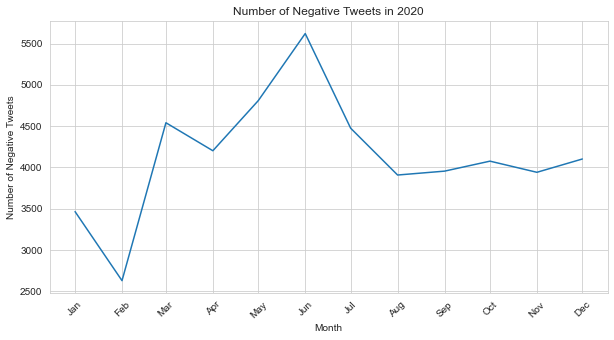

In [85]:
from datetime import datetime
x = [datetime.strptime(f'2020-{i+1}-01', '%Y-%m-%d') for i in range(12)]

plt.figure(figsize=(10, 5))
plt.plot(x, neg_tweets_by_month)

# Set the plot title and labels for the x and y axes
plt.title('Number of Negative Tweets in 2020')
plt.xlabel('Month')
plt.ylabel('Number of Negative Tweets')
plt.xticks(x, [dt.strftime('%b') for dt in x], rotation=45)

plt.show()

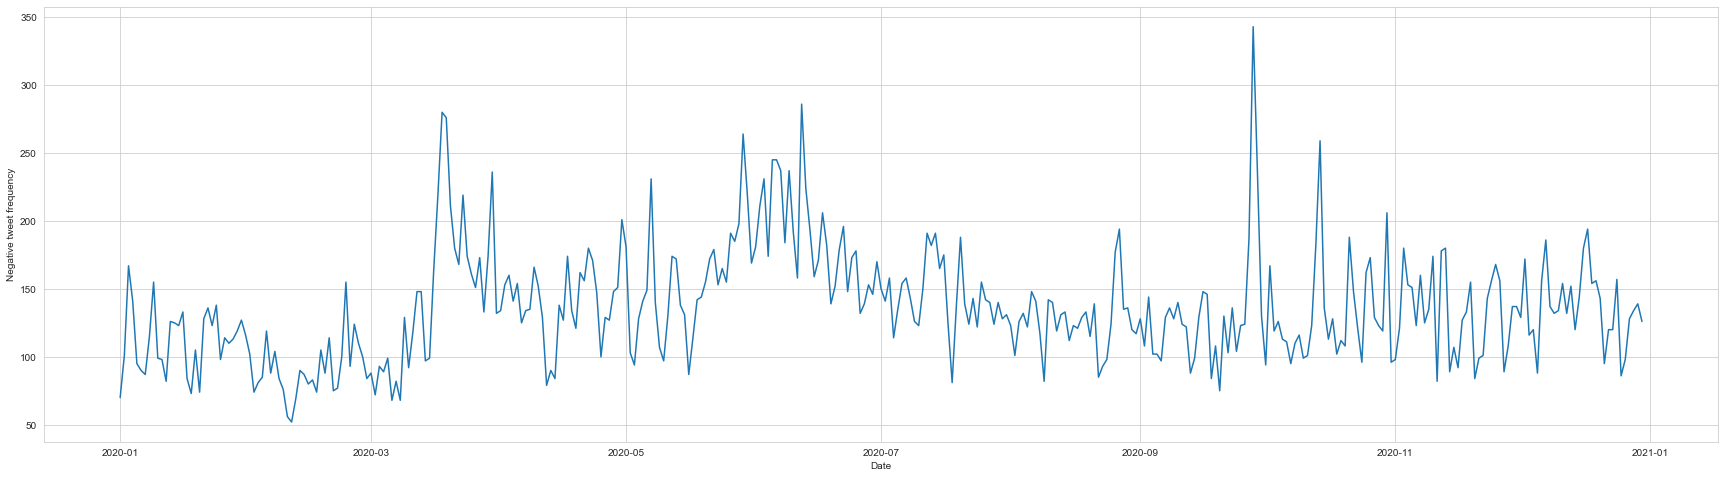

In [77]:
from datetime import datetime, timedelta

neg_tweet_counts = {}

for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    for date, df in dfs.items():
        neg_tweet_counts[date] = len(df.loc[df['Negative Sentiment']])
        
# Convert the dictionary keys to datetime objects
neg_tweet_counts = {datetime.strptime(k, '%Y-%m-%d'): v for k, v in neg_tweet_counts.items()}

# Create a list of dates for the x-axis
start_date = min(neg_tweet_counts.keys())
end_date = max(neg_tweet_counts.keys())
dates = [start_date + timedelta(days=x) for x in range((end_date-start_date).days+1)]

# Create a list of negative tweet counts for the y-axis
neg_tweet_freqs = [neg_tweet_counts.get(date, 0) for date in dates]

fig = plt.figure(figsize=(30, 8))
plt.plot(dates, neg_tweet_freqs)
plt.xlabel('Date')
plt.ylabel('Negative tweet frequency')
plt.show()

In [68]:
print("total counts of negative tweets = ", sum(neg_tweet_freqs))

total counts of negative tweets =  49724


Example of computing a single day's sentiment compound score

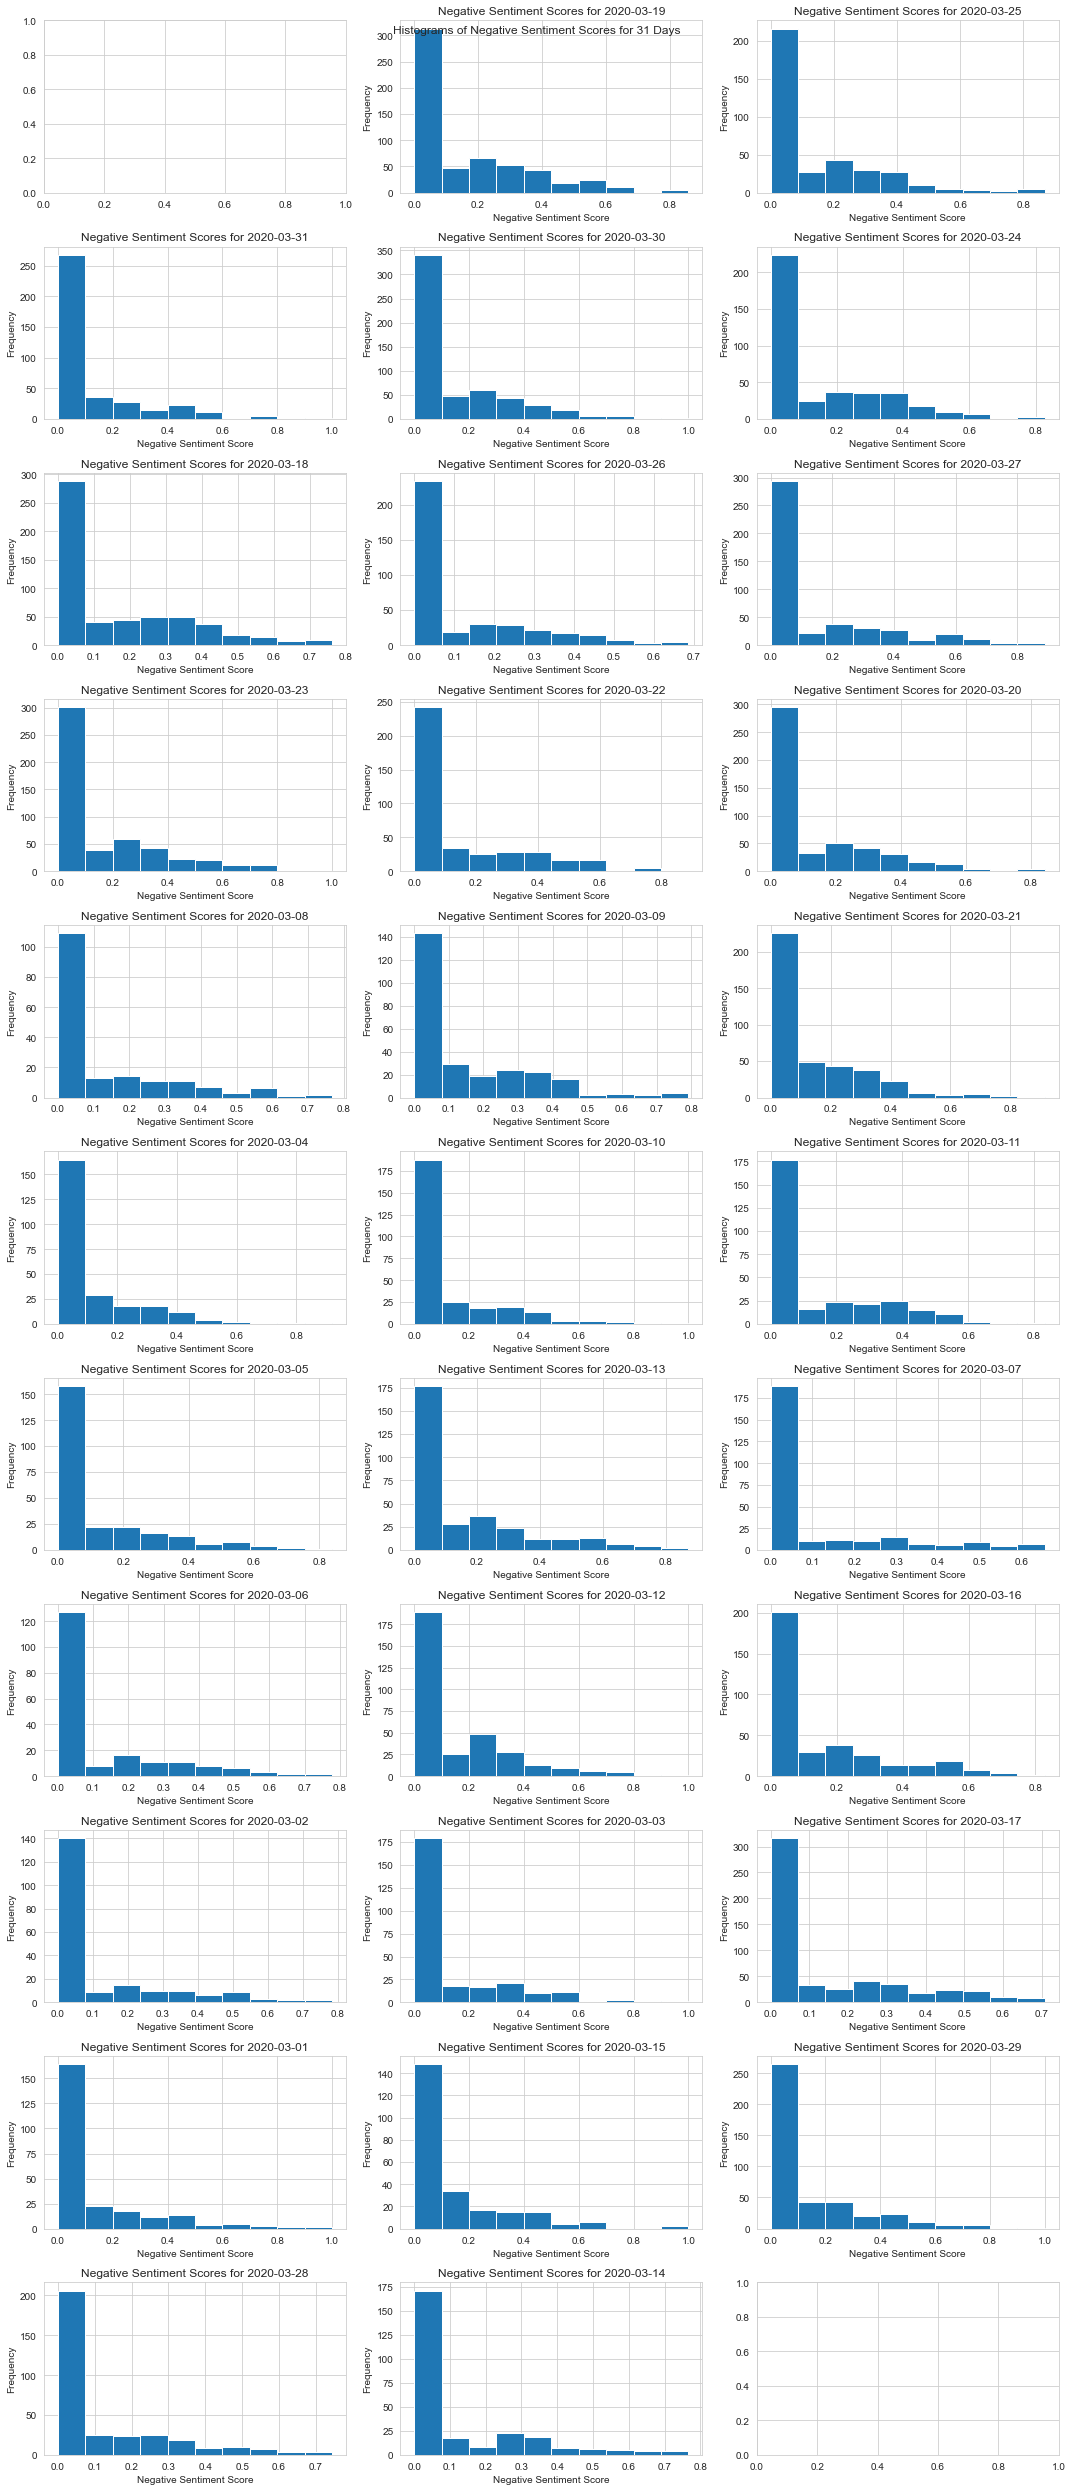

In [59]:
fig, axs = plt.subplots(nrows=11, ncols=3, figsize=(15, 35))
counter = 0
for key, df in dfs_3.items():
    # Extract negative sentiment scores into a list
    counter += 1
    negative_scores = df['Negative Scores'].tolist()
    # Create histogram on subplot
    axs[counter // 3, counter % 3].hist(negative_scores, bins=10)
    # Set subplot title
    axs[counter // 3, counter % 3].set_title(f"Negative Sentiment Scores for {key}")
    # Set x-axis label
    axs[counter // 3, counter % 3].set_xlabel('Negative Sentiment Score')
    # Set y-axis label
    axs[counter // 3, counter % 3].set_ylabel('Frequency')

fig.suptitle('Histograms of Negative Sentiment Scores for 31 Days')
fig.tight_layout()
plt.show()

## Time Series Analysis

- <b>tweets_ts: The time series object of cleaned twitter dataset</b>
- <b>neg_tweets_ts: The time series object of cleaned tweets classified as negative</b>

1. Obtain a time series object representing the number of Sinophobic tweets corresponding each month, use 01-01, 02-01, ..., 12-01 by convention

In [89]:
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2020-12-01')
date_range = pd.date_range(start_date, end_date, freq='MS')

In [90]:
tweets_ts = pd.Series(new_monthly_count_lst, index=date_range)
print(tweets_ts)

2020-01-01     8841
2020-02-01     6895
2020-03-01    10940
2020-04-01    10911
2020-05-01    12322
2020-06-01    13820
2020-07-01    11521
2020-08-01    10630
2020-09-01    10021
2020-10-01    11461
2020-11-01    11448
2020-12-01    10837
Freq: MS, dtype: int64


In [91]:
neg_tweets_ts = pd.Series(neg_tweets_by_month, index=date_range)
print(neg_tweets_ts)

2020-01-01    3465
2020-02-01    2629
2020-03-01    4541
2020-04-01    4202
2020-05-01    4809
2020-06-01    5621
2020-07-01    4475
2020-08-01    3908
2020-09-01    3955
2020-10-01    4076
2020-11-01    3941
2020-12-01    4102
Freq: MS, dtype: int64


2. Visualize the time series: Create a line plot to visualize the monthly Sinophobic tweet counts over time, which provides the overall trend and seasonality in the data.

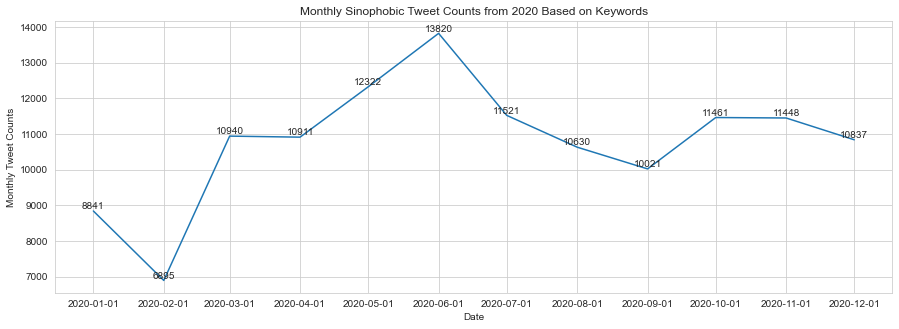

In [95]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(tweets_ts.index, tweets_ts.values)
plt.xlabel('Date')
plt.ylabel('Monthly Tweet Counts')
plt.title('Monthly Sinophobic Tweet Counts from 2020 Based on Keywords')
for date, value in tweets_ts.items():
    ax.text(date, value, value, ha='center', va='bottom')
ax.set_xticks(tweets_ts.index)
plt.show()

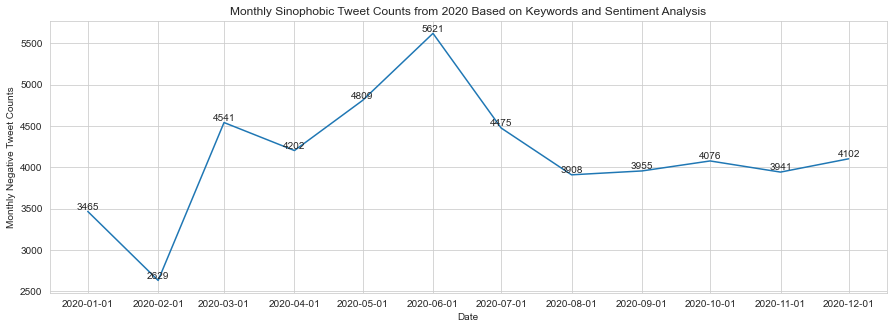

In [105]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(neg_tweets_ts.index, neg_tweets_ts.values)
plt.xlabel('Date')
plt.ylabel('Monthly Negative Tweet Counts')
plt.title('Monthly Sinophobic Tweet Counts from 2020 Based on Keywords and Sentiment Analysis')
for date, value in neg_tweets_ts.items():
    ax.text(date, value, value, ha='center', va='bottom')
ax.set_xticks(neg_tweets_ts.index)
plt.show()

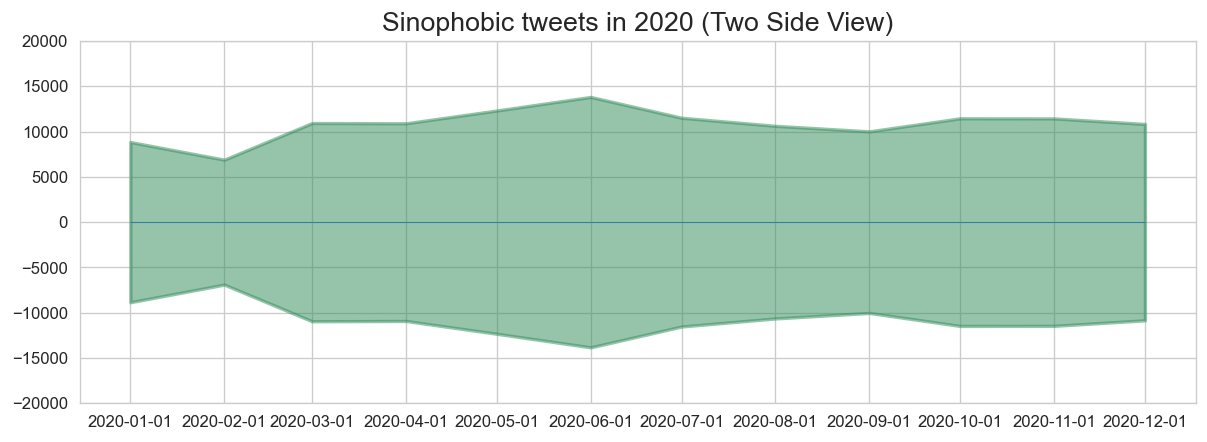

In [104]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(12,4), dpi= 120)
y1 = tweets_ts.values
x = tweets_ts.index
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-20000, 20000)
plt.xticks(x.strftime('%Y-%m'))
plt.title('Sinophobic tweets in 2020 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

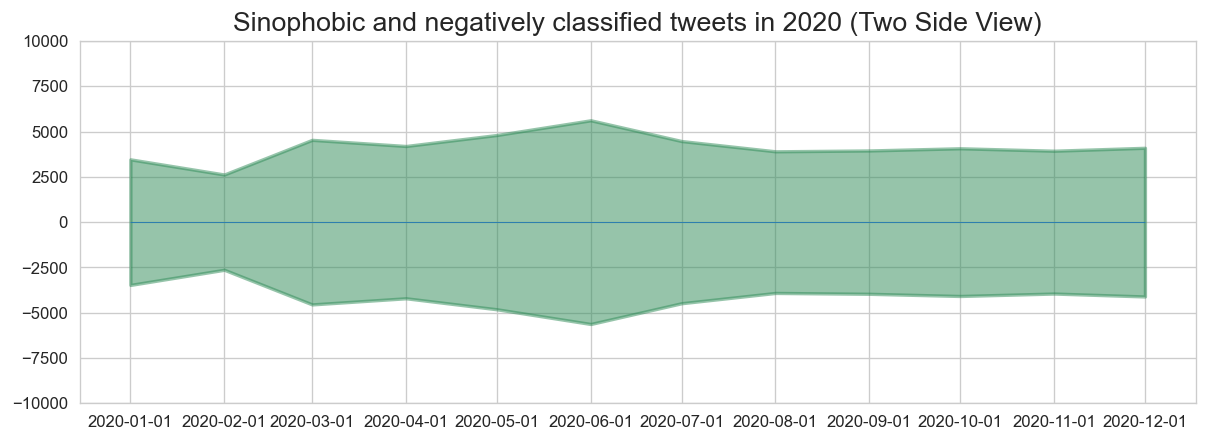

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(12,4), dpi= 120)
y1 = neg_tweets_ts.values
x = neg_tweets_ts.index
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-10000, 10000)
plt.xticks(x.strftime('%Y-%m'))
plt.title('Sinophobic and negatively classified tweets in 2020 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

3. Check for stationarity: Ensure the above time series object has consistent statistical properties overtime

<b>3.1 Augmented Dickey-Fuller Test</b>

- The most commonly used test to detect stationarity
- Null hypothesis: the time series is non-stationary, i.e., it has some time-dependent structure and does not have constant variance over time.
- If the p-value is less than some significance level (e.g. α = .05), then reject the null hypothesis and conclude that the time series is stationary.

In [109]:
from statsmodels.tsa.stattools import adfuller

In [110]:
# First check cleaned tweets without sentiment analysis filter
result = adfuller(tweets_ts)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -3.611385265961753
p-value: 0.005547059410149603
The time series is stationary.


In [111]:
# Second check cleaned tweets with sentiment analysis filter
result = adfuller(neg_tweets_ts)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -3.5232279547450087
p-value: 0.007410209467604267
The time series is stationary.


Conclusion: Both cleaned twitter time series and cleaned & negative twitter time series are stationary

<b>3.2 Kwiatkowski-Phillips-Schmidt-Shin – KPSS test </b>

- KPSS is used to test for trend stationarity
- Null hypothesis: the time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root
- If the null hypothesis is not rejected, it indicates that the time series is stationary

In [115]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

In [116]:
kpss_stat, p_value, lags_used, critical_values = kpss(tweets_ts)

print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Lags Used: {lags_used}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

KPSS Statistic: 0.22133862272980837
p-value: 0.1
Lags Used: 1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [118]:
kpss_stat1, p_value1, lags_used1, critical_values1 = kpss(neg_tweets_ts)

print(f'KPSS Statistic: {kpss_stat1}')
print(f'p-value: {p_value1}')
print(f'Lags Used: {lags_used1}')
print('Critical Values:')
for key, value in critical_values1.items():
    print(f'   {key}: {value}')

KPSS Statistic: 0.1481664496495364
p-value: 0.1
Lags Used: 1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Conclusion:

(1) The p-value are both 0.1 for cleaned and cleaned & negative twitter time series objects, which are both greater than the significance level of 0.1, so we cannot reject the null hypothesis at a 10% significance level for both time series objects.

(2) Both test statistics are less than all the critical values, so we cannot reject the null hypothesis of trend-stationarity.

(3) Overall, the cleaned twitter time series and the cleaned & negative time series are trend-stationary.

<b>3.3 Philips Perron test (PP Test)</b>

- PP test is built on the ADF test, while the ADF test addresses uses lags as regressors, the PP test makes a non-parametric correction to the t-test statistic
- Null hypothesis: a time series is integrated of order 1, i.e., there is a unit root
- If p-value is significant then we reject the null hypothesis of the time series being stationary, and conclude that the series is non-stationary

In [123]:
pp_test = sm.tsa.adfuller(tweets_ts.values, maxlag=4, autolag='AIC', regression='nc')
print('Phillips-Perron Statistic: %f' % pp_test[0])
print('p-value: %f' % pp_test[1])
print('Critical Values:')
for key, value in pp_test[4].items():
    print('\t%s: %.3f' % (key, value))

Phillips-Perron Statistic: 0.045303
p-value: 0.699145
Critical Values:
	1%: -2.799
	5%: -1.970
	10%: -1.596


In [124]:
pp_test = sm.tsa.adfuller(neg_tweets_ts.values, maxlag=4, autolag='AIC', regression='nc')
print('Phillips-Perron Statistic: %f' % pp_test[0])
print('p-value: %f' % pp_test[1])
print('Critical Values:')
for key, value in pp_test[4].items():
    print('\t%s: %.3f' % (key, value))

Phillips-Perron Statistic: -0.818477
p-value: 0.362772
Critical Values:
	1%: -2.959
	5%: -1.957
	10%: -1.560


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


Conclusion:

Both of the p-values (0.699145 and 0.362772) is greater than the significance level (0.05), we fail to reject the null hypothesis that the series has a unit root and is non-stationary. However, the PP statistic is positive and very close to 0, indicating that these two time series are not very far from being stationary.

4. Autocorrelation and Partial Autocorrelation Functions 

The ACF measures the correlation between a time series and its own lagged values at different lags. The ACF plot shows the correlation coefficients for each lag, with the correlation coefficients on the y-axis and the lags on the x-axis. A significant autocorrelation at a given lag suggests that the value at that lag is related to the value at the current time point.

The PACF, on the other hand, measures the correlation between a time series and its lagged values after accounting for the correlation with the intervening lags. In other words, it measures the direct effect of a specific lag on the current value, while controlling for the effects of the other lags. The PACF plot also shows the correlation coefficients for each lag, with the correlation coefficients on the y-axis and the lags on the x-axis.

In [128]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

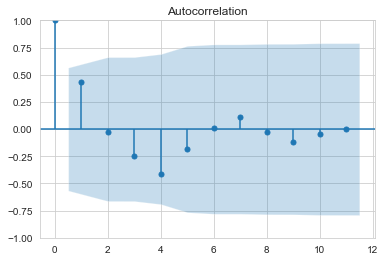

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


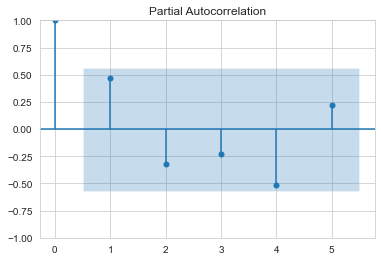

In [129]:
# Plot ACF
plot_acf(tweets_ts.values)
plt.show()

# Plot PACF
plot_pacf(tweets_ts, lags=5)
plt.show()

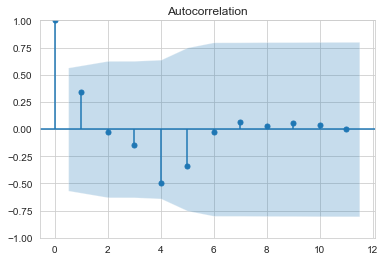

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


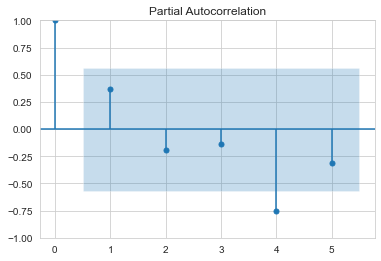

In [130]:
# Plot ACF
plot_acf(neg_tweets_ts.values)
plt.show()

# Plot PACF
plot_pacf(neg_tweets_ts, lags=5)
plt.show()

- In both time series ACF plots, only the first lags fall outside the blue shaded region and the rest are very small and approaching zero, indicating that there is only a weak autocorrelation between the observations in the time series. 

- This means there is little relationship between the current observation and previous observations. This can be a sign that the time series is random or noisy, and that there is no underlying pattern or trend that can be modeled. 

- The positive and negative signs on both time series ACF plots indicate that the autocorrelation alternates between positive and negative values, which is a sign of randomness.

4. Autoregressive Integrated Moving Average (ARIMA) 

4.1 Determine 3 parameters
- The order of autoregression (p) refers to the number of past values in the series that are used to predict the current value. 
- The order of moving average (q) refers to the number of past forecast errors that are used to predict the current value. 
- The order of integration (d) refers to the number of times the series is differenced to achieve stationarity.

In [ ]:
# plot_acf(ts_diff.tweet_counts)
# plt.show()
# plot_pacf(ts_diff, lags=4)
# plt.show()

5. Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In [131]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

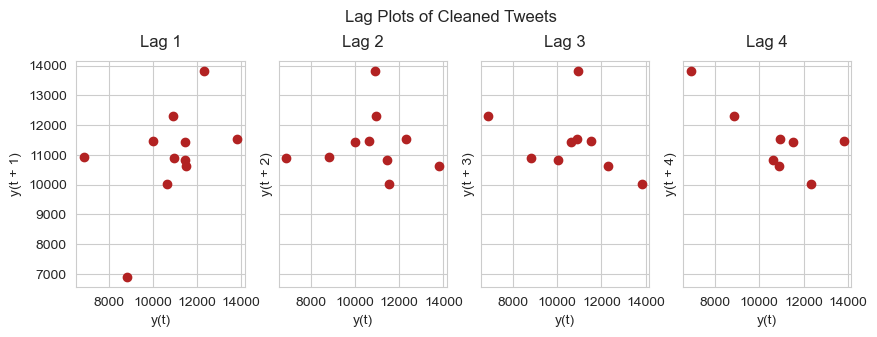

In [133]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(tweets_ts, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Cleaned Tweets', y=1.05)    
plt.show()

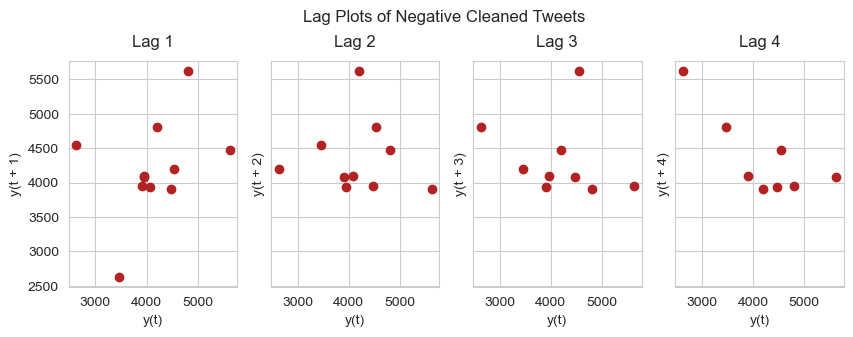

In [134]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(neg_tweets_ts, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Negative Cleaned Tweets', y=1.05)    
plt.show()

Since there does not seem to be patterns in the plots of different lag values, the series is likely to be random white noise

In [135]:
tweets_ts.to_csv('tweets_ts.csv')
neg_tweets_ts.to_csv('neg_tweets_ts.csv')

## Google Search Trends Analysis

1. Identify keywords:  "Chinese virus," "China virus," "Wuhan virus," "Kun Flu" as complimentary searches for Twitter dataset ("chink," "chinaman", "chinkland", "chyna", and "gook")

Note: The specific days included in Google Search Trends data are representative of overall search activity for the given time period. The specific days included in the sample are chosen based on a variety of factors, including the volume of searches for the given term and the overall distribution of search activity during the time period.

In [136]:
google_df = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/google_search.csv')
google_df.head()

,Week,chink: (United States),chinese virus: (United States),china virus: (United States),wuhan virus: (United States),kung flu: (United States)
0,2020-01-05,1,<1,1,<1,0
1,2020-01-12,1,1,3,1,0
2,2020-01-19,1,18,100,39,<1
3,2020-01-26,1,16,95,57,2
4,2020-02-02,1,6,38,24,1


In [137]:
columns = google_df.columns.tolist()
columns

['Week',
 'chink: (United States)',
 'chinese virus: (United States)',
 'china virus: (United States)',
 'wuhan virus: (United States)',
 'kung flu: (United States)']

In [138]:
google_df = google_df.rename(columns={'chink: (United States)': 'chink', 'chinese virus: (United States)': 'chinese virus',
               'china virus: (United States)': 'china virus', 'wuhan virus: (United States)': 'wuhan virus',
               'kung flu: (United States)': 'kung flu'})

In [139]:
google_df.head()

,Week,chink,chinese virus,china virus,wuhan virus,kung flu
0,2020-01-05,1,<1,1,<1,0
1,2020-01-12,1,1,3,1,0
2,2020-01-19,1,18,100,39,<1
3,2020-01-26,1,16,95,57,2
4,2020-02-02,1,6,38,24,1


In [141]:
type(google_df['Week'][2])

str

In [142]:
google_df = google_df.set_index('Week')
google_df.index = pd.to_datetime(google_df.index, format='%Y-%m-%d')

In [144]:
google_df.head()

,chink,chinese virus,china virus,wuhan virus,kung flu
Week,,,,,
2020-01-05,1,<1,1,<1,0
2020-01-12,1,1,3,1,0
2020-01-19,1,18,100,39,<1
2020-01-26,1,16,95,57,2
2020-02-02,1,6,38,24,1


Notice that in the Google Search Trend, "<1" indicates that the search volume for a particular search term during a given time period is too low to be shown as a numerical value, while "0" indicates that there were no searches for that particular search term during the given time period. In the following part I will convert "<1" into 0.5

In [146]:
google_df = google_df.replace('<1', '0.5')

In [148]:
google_df['chinese virus'] = google_df['chinese virus'].astype(float)
google_df['china virus'] = google_df['china virus'].astype(float)
google_df['wuhan virus'] = google_df['wuhan virus'].astype(float)
google_df['kung flu'] = google_df['kung flu'].astype(float)

In [149]:
monthly_google = google_df.resample('M').mean()
monthly_google

,chink,chinese virus,china virus,wuhan virus,kung flu
Week,,,,,
2020-01-31,1.0,8.875,49.75,24.375,0.625
2020-02-29,1.0,5.000,28.50,14.250,0.625
2020-03-31,1.0,14.800,54.20,13.600,3.300
2020-04-30,1.0,4.000,16.00,6.000,0.625
2020-05-31,1.0,1.400,4.80,1.800,0.500
2020-06-30,1.0,1.125,5.25,1.000,3.875
2020-07-31,1.0,1.000,4.50,1.000,0.750
2020-08-31,1.0,0.800,2.60,0.700,0.500
2020-09-30,1.0,1.000,2.25,0.625,0.500


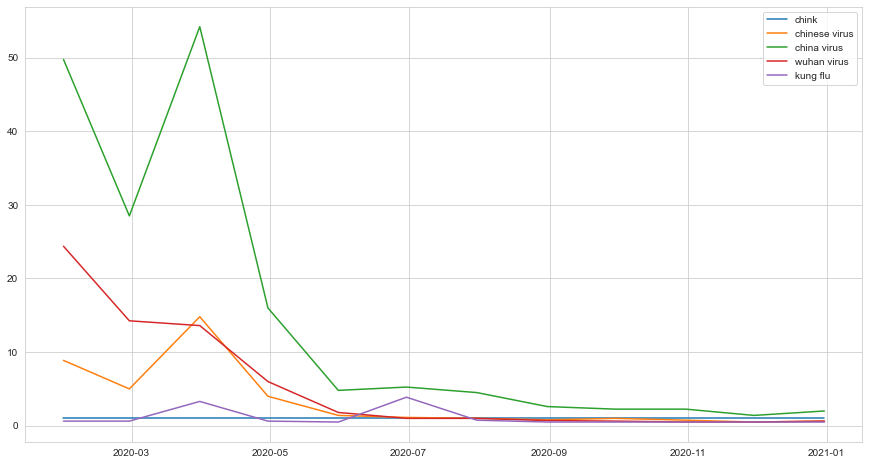

In [150]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(monthly_google.index, monthly_google['chink'], label='chink')
ax.plot(monthly_google.index, monthly_google['chinese virus'], label='chinese virus')
ax.plot(monthly_google.index, monthly_google['china virus'], label='china virus')
ax.plot(monthly_google.index, monthly_google['wuhan virus'], label='wuhan virus')
ax.plot(monthly_google.index, monthly_google['kung flu'], label='kung flu')
ax.legend()
plt.show()

Check individual Google search term's stationarity

In [151]:
result1 = adfuller(monthly_google['chink'])

print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
if result1[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: nan
p-value: nan
The time series is not stationary.


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [152]:
result2 = adfuller(monthly_google['chinese virus'])

print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
if result2[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -2.173419
p-value: 0.216034
The time series is not stationary.


In [153]:
result3 = adfuller(monthly_google['china virus'])

print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])
if result3[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -4.109986
p-value: 0.000932
The time series is stationary.


In [154]:
result4 = adfuller(monthly_google['wuhan virus'])

print('ADF Statistic: %f' % result4[0])
print('p-value: %f' % result4[1])
if result4[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -1.960769
p-value: 0.304035
The time series is not stationary.


In [155]:
result5 = adfuller(monthly_google['kung flu'])

print('ADF Statistic: %f' % result5[0])
print('p-value: %f' % result5[1])
if result5[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -3.543811
p-value: 0.006931
The time series is stationary.


In [156]:
combined_google_df = monthly_google[['chink', 'chinese virus', 'china virus', 'wuhan virus', 'kung flu']].sum(axis=1)
combined_google_df

Week
2020-01-31    84.625
2020-02-29    49.375
2020-03-31    86.900
2020-04-30    27.625
2020-05-31     9.500
2020-06-30    12.250
2020-07-31     8.250
2020-08-31     5.600
2020-09-30     5.375
2020-10-31     5.000
2020-11-30     3.900
2020-12-31     4.750
Freq: M, dtype: float64

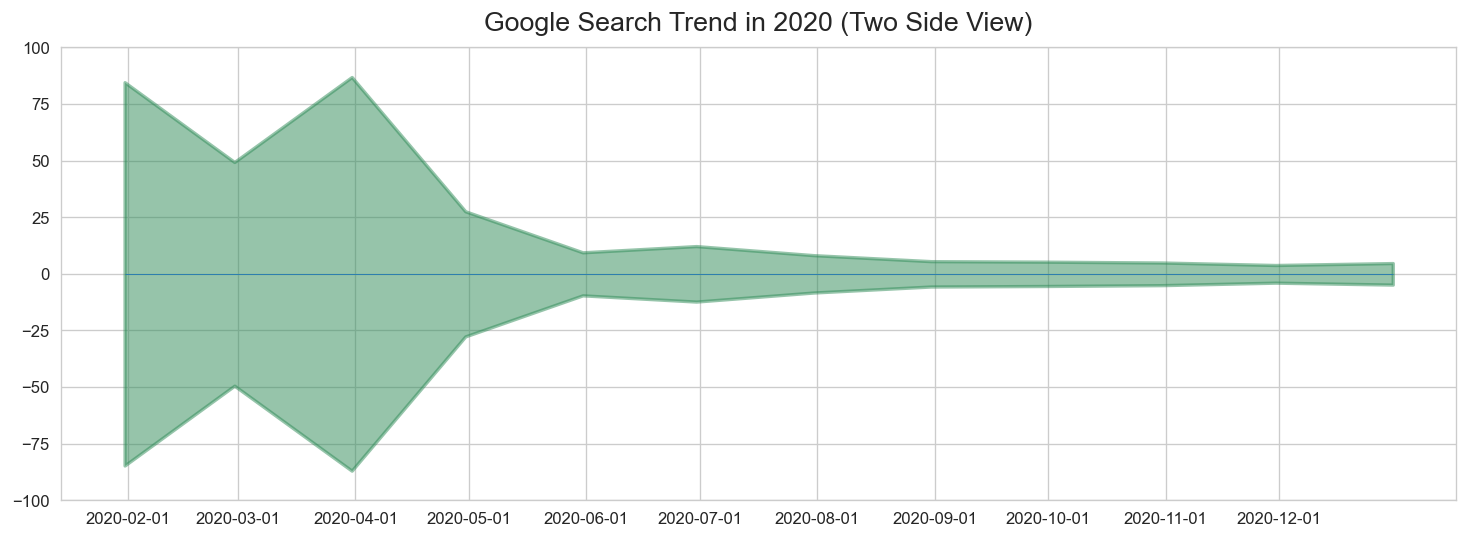

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(15,5), dpi= 120)
y1 = combined_google_df.values
x = combined_google_df.index
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-100, 100)
plt.xticks(x.strftime('%Y-%m'))
plt.title('Google Search Trend in 2020 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

In [158]:
result_combined = adfuller(combined_google_df)

print('ADF Statistic:', result_combined[0])
print('p-value:', result_combined[1])

if result_combined[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: 0.5606759555229119
p-value: 0.9866051673662204
The time series is not stationary.


In [159]:
combined_google_diff = combined_google_df.diff().dropna()
print(combined_google_diff)

Week
2020-02-29   -35.250
2020-03-31    37.525
2020-04-30   -59.275
2020-05-31   -18.125
2020-06-30     2.750
2020-07-31    -4.000
2020-08-31    -2.650
2020-09-30    -0.225
2020-10-31    -0.375
2020-11-30    -1.100
2020-12-31     0.850
Freq: M, dtype: float64


In [160]:
result_combined_diff = adfuller(combined_google_diff)

print('ADF Statistic:', result_combined_diff[0])
print('p-value:', result_combined_diff[1])

if result_combined_diff[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -3.95378276755044
p-value: 0.0016728220070972228
The time series is stationary.


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


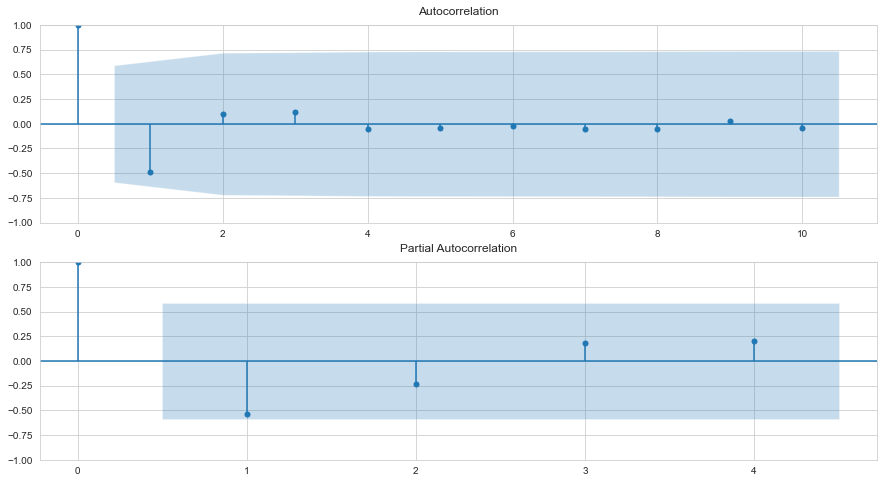

In [161]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
plot_acf(combined_google_diff, ax=ax[0], lags=10)
plot_pacf(combined_google_diff, ax=ax[1], lags=4)
plt.show()

From the above observation and process, d=1, q=5, p=3

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
model_google = ARIMA(combined_google_diff, order=(1, 6, 5))
model_google_fit = model_google.fit()

# make predictions for the next 6 months
forecast = model_google_fit.forecast(steps=6)

# print the forecasted values
print(forecast)

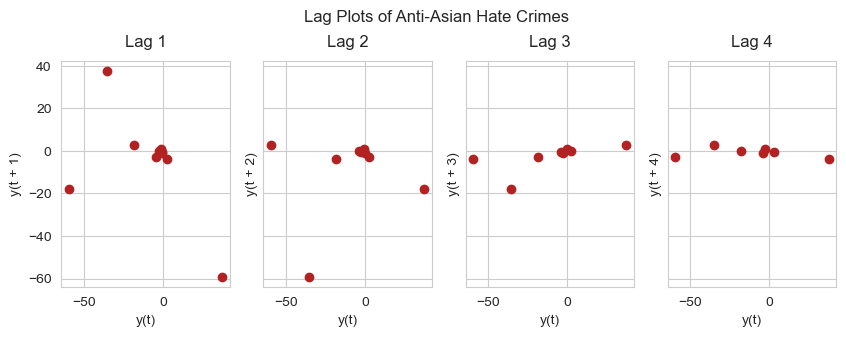

In [162]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Convert the NumPy array to a pandas Series
combined_google_diff_series = pd.Series(combined_google_diff)

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(combined_google_diff_series, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Anti-Asian Hate Crimes', y=1.05)    
plt.show()

In [163]:
combined_google_diff.to_csv('processed_google_df.csv', index=False)

### 1. Rolling Means
The rolling mean can be useful for smoothing out the noise in a time series and identifying trends or patterns in the data.

In [ ]:
rolling_mean = dfs_6['2020-06-15']['Compound Scores'].rolling(window=5).mean()

In [ ]:
rolling_mean

In [ ]:
rolling_mean.iloc[-1]

Autocorrelation is a statistical concept that measures the linear relationship between lagged values of a time series. Autocorrelation measures how well the current value of a time series is related to its past values at different lags.

In the context of sentiment analysis, autocorrelation of compound scores measures the linear relationship between the sentiment of a tweet at a given time point and the sentiment of the tweet at previous time points. If the autocorrelation is high, it means that the sentiment of a tweet at a given time point is highly correlated with the sentiment of the tweet at previous time points.

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dfs_6['2020-06-15']['Compound Scores'])
plt.show()

Compute the rolling mean of each day's tweet

In [ ]:
def day_rol_mean(dfs):
    ''' 
    Helper function to get each day's rolling mean in the end in a given month DataFrame
    '''
    
    ultimate_rol_mean_lst = []
    
    for _, df in dfs.items():
        rolling_mean = df.rolling(window=7).mean()
        ultimate_rol_mean = rolling_mean.iloc[-1]['Compound Scores']
        ultimate_rol_mean_lst.append(ultimate_rol_mean)
    
    return ultimate_rol_mean_lst


In [ ]:
ex_df = dfs_10['2020-10-03']
rolling_mean = ex_df.rolling(window=7).mean()
ultimate_rol_mean = rolling_mean.iloc[-1]['Compound Scores']
ultimate_rol_mean

In [ ]:
ex_mean_lst = day_rol_mean(dfs_10)
len(ex_mean_lst)

In [ ]:
lst_month_rol_mean = []
for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    monthly_rol_mean = day_rol_mean(dfs)
    lst_month_rol_mean.append(monthly_rol_mean)
lst_month_rol_mean

In [ ]:
len(lst_month_rol_mean)

In [ ]:
lst_month_rol_mean[0]

In [ ]:
flat_lst = [item for sublist in lst_month_rol_mean for item in sublist]
flat_lst

In [ ]:
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2020-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

df = pd.DataFrame({'Month': [], 'Value': []}, index=pd.to_datetime([]))
for i in range(12):
    month_data = flat_lst[i*31:(i+1)*31] if i != 11 else flat_lst[i*31:]  # slice the data for the corresponding month
    month_name = f"Month {i+1}"
    for j, day_data in enumerate(month_data):
        date = date_range[i*31+j]
        df.loc[date, 'Month'] = month_name
        df.loc[date, 'Value'] = day_data

In [ ]:
# calculate summary statistics
print(df.describe())

In [ ]:
df.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
df.plot(ax=ax)

ax.axhline(y=0, color='black', linestyle='--')  # add a horizontal line at y=0

ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Compound Score')
ax.set_title('Twitter Sentiment Score Plot')

# show the plot
plt.show()

In [ ]:
import statsmodels.api as sm

# Convert the list to a Pandas DataFrame with a DatetimeIndex
dates_mon = pd.date_range(start='2020-01-01', end='2020-12-01', freq='MS')
df_mon = pd.DataFrame({'compound score': df['Value']}, index=dates_mon)

# Calculate a rolling mean with a window size of 3
rolling_mean_mon = df_mon['compound score'].rolling(window=2).mean()

# Perform a trend analysis using a Hodrick-Prescott filter
cycle_mon, trend_mon = sm.tsa.filters.hpfilter(df_mon['compound score'], lamb=1600)

print("Rolling Mean:\n", rolling_mean_mon)
print("\nTrend Analysis:\n", trend_mon)

<b><i>Rolling Means Analysis -- Short-Term/</i></b>

This rolling mean shows the average sentiment score over a period of time, with each data point representing the average score for the previous 3 months.

For this particular rolling mean, we can see that the sentiment score started off high in February 2020, but then sharply decreased in March and April before stabilizing around a slightly negative sentiment score for the rest of the year.

One interesting point to note is the sudden spike in sentiment score in September and October, which suggests a temporary shift in sentiment towards a more positive outlook, before returning to a slightly negative sentiment score in the final months of the year.

<b><i>Trend Analysis -- Long-Term</i></b>

the trend analysis suggests that the sentiment compound score decreased gradually over the year 2020, with a negative trend. This suggests that there was a decreasing trend in the negativity of anti-Chinese sentiment on Twitter over the year 2020.

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(rolling_mean_mon.index, rolling_mean_mon.values)
plt.title("Rolling Mean on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [ ]:
dates = pd.date_range(start='2020-01-01', end='2020-12-01', freq='D')
df_day = pd.DataFrame({'compound score': df['Value']}, index=dates)

rolling_mean_day = df_day['compound score'].rolling(window=3).mean()

# Perform a trend analysis using a Hodrick-Prescott filter
cycle_day, trend_day = sm.tsa.filters.hpfilter(df_day['compound score'], lamb=1600)

print("Rolling Mean:\n", rolling_mean_day)
print("\nTrend Analysis:\n", trend_day)

In [ ]:
plt.figure(figsize=(20, 12))

plt.plot(rolling_mean_day.index, rolling_mean_day.values)
plt.title("Rolling Mean on Daily Basis")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Load stock prices data
stock_prices = pd.read_csv('stock_prices.csv', index_col=0, parse_dates=True)

# Merge the tweet data with the stock prices data on the same datetime index
merged_df = pd.merge(dfs_6['2020-06-15'], stock_prices, left_index=True, right_index=True)

# Perform Granger causality test on the merged DataFrame
granger_results = grangercausalitytests(merged_df[['Compound Scores', 'Stock Price']], maxlag=7)